<a href="https://colab.research.google.com/github/sebas-serrano/Diabetes_Health_Indicators/blob/main/notebooks/Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indicadores de Salud de la Diabetes

Este proyecto tiene como finalidad tratar el tema de la diabetes en los Estados Unidos.

El data set se saco de la pagina kaggle https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

La diabetes es una de las enfermedades crónicas más comunes en Estados Unidos, afectando a millones de personas y generando un fuerte impacto económico. Se produce cuando el cuerpo pierde la capacidad de regular adecuadamente la glucosa en sangre, ya sea por una producción insuficiente de insulina o por una mala utilización de la misma. Esto puede reducir la calidad y la esperanza de vida.

Los niveles elevados de azúcar en sangre, mantenidos en el tiempo, pueden causar complicaciones graves como enfermedades cardíacas, pérdida de visión, amputaciones y daño renal. Aunque no tiene cura, hábitos saludables, actividad física y tratamientos médicos adecuados pueden reducir significativamente sus efectos. La detección temprana es clave, y por eso los modelos predictivos son herramientas valiosas para la salud pública.

En cuanto a su magnitud, en 2018 se estimaba que 34,2 millones de estadounidenses tenían diabetes y 88 millones presentaban prediabetes, muchos sin saberlo. La diabetes tipo II es la más frecuente y su prevalencia varía según factores como edad, ingresos, educación, raza y condiciones socioeconómicas. Además, esta enfermedad implica un costo económico enorme, superando los 327 mil millones de dólares anuales.

Preguntas de investigación sugeridas

*   ¿Pueden las preguntas de la encuesta BRFSS predecir con precisión si una persona tiene diabetes?
*   ¿Qué factores de riesgo son los más predictivos del desarrollo de diabetes?
*   ¿Podemos usar solo un subconjunto de factores de riesgo para predecir con precisión la presencia de diabetes?
*   ¿Es posible crear una versión reducida del cuestionario BRFSS, seleccionando solo las variables más importantes, que permita predecir si alguien tiene diabetes o está en alto riesgo?


# ETL

## 1- EXTRACT - Carga de Datos

In [1]:
!git clone https://github.com/sebas-serrano/Diabetes_Health_Indicators.git

Cloning into 'Diabetes_Health_Indicators'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 146 (delta 65), reused 6 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (146/146), 6.04 MiB | 2.24 MiB/s, done.
Resolving deltas: 100% (65/65), done.


Importacion de librerias / Lectura de archivos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

Mounted at /content/drive


In [4]:
import pandas as pd

df_multi = pd.read_csv("/content/Diabetes_Health_Indicators/data/diabetes_012_health_indicators_BRFSS2015.csv")
df_multi.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 2 - TRANSFORM - Limpieza y Preparación de Datos

*  Revisión inicial (shape, info, head)
*  Limpieza de valores (nulos, formatos)
*  Limpieza estructural (columnas nulas, duplicados, eliminar columnas)
*  Feature engineering

In [5]:
df_multi.shape

(253680, 22)

In [6]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Es claro que no hay columnas con informacion NULA, asi que no eliminamos ninguna columna.

# EDA - Análisis Exploratorio Univariado

El Análisis Exploratorio de Datos (EDA) tiene como objetivo comprender en profundidad la estructura, distribución y comportamiento de las variables que componen el dataset, así como identificar patrones, tendencias y posibles relaciones entre ellas. Esta etapa resulta fundamental para orientar las decisiones posteriores de transformación de datos, selección de variables y modelado.

En primer lugar, se analiza la variable objetivo Diabetes_012, con el fin de comprender su distribución y el grado de desbalance entre clases. Este análisis permite dimensionar el problema y anticipar posibles desafíos en la etapa de modelado.

Posteriormente, se realiza un análisis univariado de las variables cuantitativas, evaluando su distribución, dispersión y presencia de valores extremos. En particular, se profundiza en variables clave como BMI (Índice de Masa Corporal) y MentHlth (Salud Mental), dada su relevancia clínica y su potencial relación con el riesgo de diabetes.

Finalmente, se analizan las variables cualitativas o categóricas, observando la frecuencia de sus categorías y su comportamiento general dentro de la población estudiada. Este conjunto de análisis permite obtener una visión integral del dataset y sienta las bases para el análisis bivariado y el posterior desarrollo de modelos predictivos.


### Analisis de la variable Objetivo Diabetes_012

In [7]:
# Confirmamos el tipo de la columna es Float
print(df_multi['Diabetes_012'].dtype)

float64


In [8]:
# Vemos que valores tiene la variable
df_multi['Diabetes_012'].value_counts().sort_index()

,count
Diabetes_012,
0.0,213703
1.0,4631
2.0,35346


Gráfica de distribución de la variable objetivo (Diabetes_012)

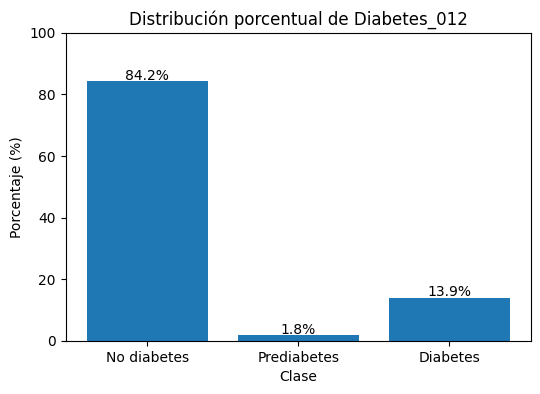

In [9]:
import matplotlib.pyplot as plt

# Conteo y porcentaje
counts = df_multi['Diabetes_012'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Gráfico
plt.figure(figsize=(6,4))
plt.bar(
    ['No diabetes', 'Prediabetes', 'Diabetes'],
    percentages.values
)

plt.title('Distribución porcentual de Diabetes_012')
plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')

# Etiquetas con porcentaje
for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.ylim(0, 100)
plt.show()

La variable objetivo Diabetes_012 presenta un fuerte desbalance de clases.
La gran mayoría de los registros corresponde a personas sin diabetes (84,2%), mientras que los casos de diabetes representan el 13,9% y la prediabetes apenas el 1,8% del total.

Este desbalance implica que los modelos de clasificación podrían verse sesgados hacia la clase mayoritaria si no se aplican estrategias adecuadas durante el modelado. En particular, la clase Prediabetes se encuentra subrepresentada, lo que dificulta su correcta identificación y justifica el uso de métricas más robustas que la accuracy, así como técnicas de balanceo o ajustes en el entrenamiento.

Desde el punto de vista del negocio y la salud pública, este comportamiento es relevante, ya que refuerza la importancia de detectar correctamente los casos minoritarios, especialmente aquellos en riesgo de desarrollar diabetes.

### **Análisis univariado de variables cuantitativas**

(Numéricas continuas o discretas)

1. BMI
2. MentHlth
3. PhysHlth
4. Age
5. GenHlth
6. Education
7. Income

In [10]:
df_multi[
    ['BMI','MentHlth','PhysHlth','Age','GenHlth','Education','Income']
].describe()

,BMI,MentHlth,PhysHlth,Age,GenHlth,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081,8.032119,2.511392,5.050434,6.053875
std,6.608694,7.412847,8.717951,3.054220,1.068477,0.985774,2.071148
min,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,6.000000,2.000000,4.000000,5.000000
50%,27.000000,0.000000,0.000000,8.000000,2.000000,5.000000,7.000000
75%,31.000000,2.000000,3.000000,10.000000,3.000000,6.000000,8.000000
max,98.000000,30.000000,30.000000,13.000000,5.000000,6.000000,8.000000


Genera un gráfico univariado con histograma y boxplot para una variable numérica.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_univariate_distribution(df, variable, bins=30, figsize=(10, 4)):
    """
    Genera un gráfico univariado con histograma y boxplot para una variable numérica.

    Parámetros:
    - df: DataFrame
    - variable: nombre de la columna a analizar (str)
    - bins: cantidad de bins del histograma
    - figsize: tamaño de la figura
    """

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Histograma
    axes[0].hist(df[variable], bins=bins)
    axes[0].set_title(f'Distribución de {variable}')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(y=df[variable], ax=axes[1])
    axes[1].set_title(f'Boxplot de {variable}')
    axes[1].set_ylabel(variable)

    plt.tight_layout()
    plt.show()

#### **BMI (Índice de Masa Corporal)**

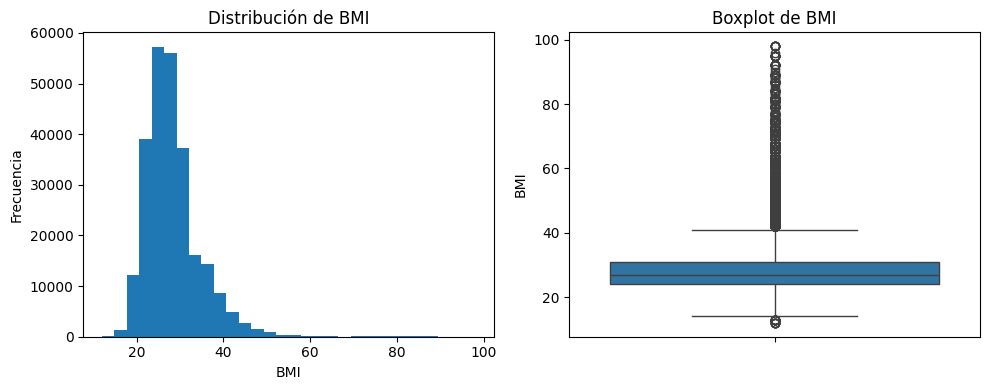

In [12]:
plot_univariate_distribution(df_multi, 'BMI')

La distribución del Índice de Masa Corporal (BMI) presenta una asimetría positiva (sesgo a la derecha). La mayor concentración de individuos se encuentra entre valores aproximados de 20 y 30, lo cual corresponde a rangos de peso normal y sobrepeso leve.

Se observa una cola larga hacia valores altos de BMI, con presencia de registros extremos que superan valores de 50 e incluso alcanzan valores cercanos a 100. Estos valores extremos pueden corresponder a casos de obesidad severa o a posibles errores de registro, por lo que deben ser analizados con mayor detalle en etapas posteriores del proceso.

La relación BMI (masa corporal) vs Edad

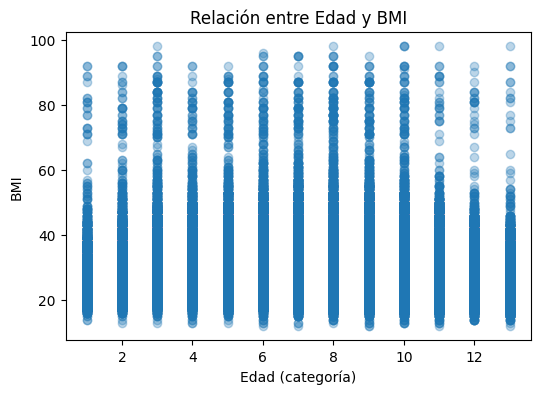

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df_multi['Age'], df_multi['BMI'], alpha=0.3)
plt.xlabel('Edad (categoría)')
plt.ylabel('BMI')
plt.title('Relación entre Edad y BMI')
plt.show()

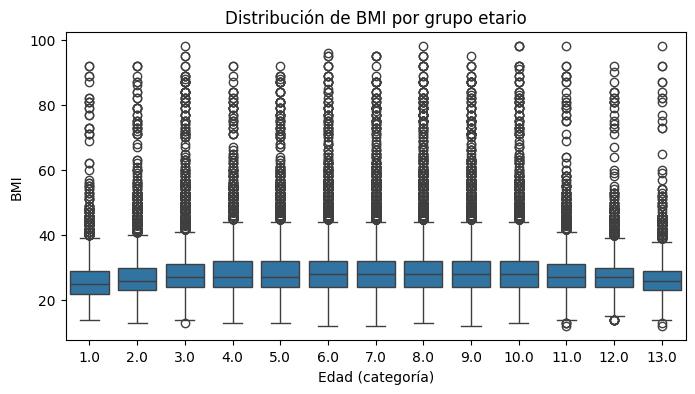

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x='Age', y='BMI', data=df_multi)
plt.xlabel('Edad (categoría)')
plt.ylabel('BMI')
plt.title('Distribución de BMI por grupo etario')
plt.show()

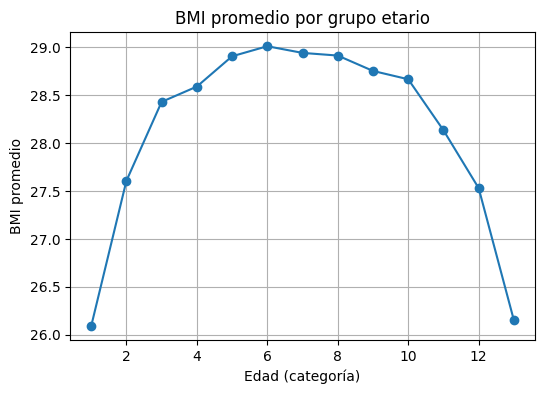

In [15]:
bmi_por_edad = df_multi.groupby('Age')['BMI'].mean()

plt.figure(figsize=(6,4))
bmi_por_edad.plot(marker='o')
plt.xlabel('Edad (categoría)')
plt.ylabel('BMI promedio')
plt.title('BMI promedio por grupo etario')
plt.grid(True)
plt.show()

In [16]:
df_multi[['Age','BMI']].corr()

,Age,BMI
Age,1.000000,-0.036618
BMI,-0.036618,1.000000


La correlación lineal entre edad y BMI es cercana a cero, lo cual es consistente con el carácter ordinal de la variable edad y con una relación no lineal entre ambas variables. Sin embargo, el análisis por grupos etarios muestra variaciones sistemáticas del BMI según la edad, lo que evidencia una relación que no es capturada por la correlación de Pearson.


<Axes: xlabel='Age', ylabel='BMI'>

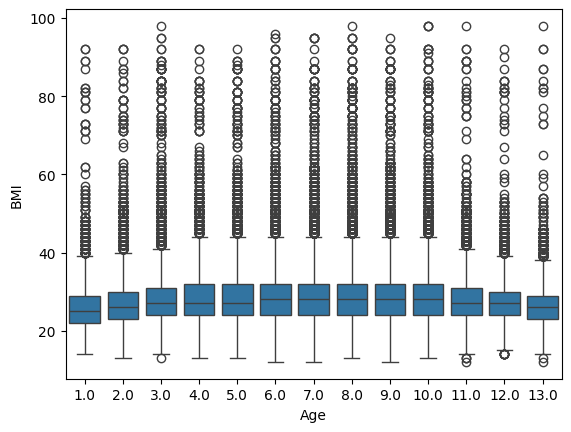

In [17]:
sns.boxplot(x='Age', y='BMI', data=df_multi)

In [18]:
df_multi[['Age','BMI']].corr(method='spearman')

,Age,BMI
Age,1.000000,-0.024591
BMI,-0.024591,1.000000


#### **MentHlth (Salud Mental)**

MentHlth (Salud Mental)
La variable MentHlth representa la cantidad de días, durante los últimos 30 días, en los que la persona reportó no haber tenido una buena salud mental. Esto incluye situaciones como estrés, depresión o problemas emocionales, y toma valores enteros entre 0 y 30.

In [19]:
df_multi['MentHlth'].describe()

,MentHlth
count,253680.000000
mean,3.184772
std,7.412847
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,30.000000


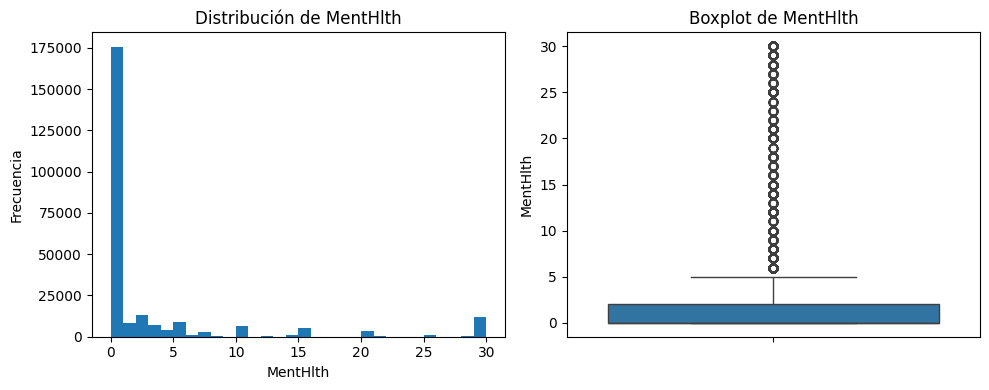

In [20]:
plot_univariate_distribution(df_multi, 'MentHlth')

La variable MentHlth presenta una distribución altamente asimétrica, con predominio de valores bajos y una cola extensa hacia valores altos. Aunque la mayoría de los individuos reporta pocos o ningún día de mala salud mental, existe un subconjunto relevante de la población con una carga significativa de problemas de salud mental. Dado su carácter clínicamente válido y su potencial relación con la diabetes, esta variable se conserva íntegramente para el análisis y el modelado.

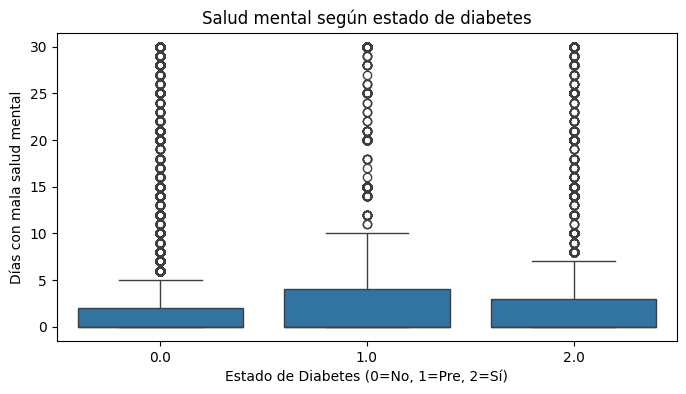

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Diabetes_012', y='MentHlth', data=df_multi)
plt.title('Salud mental según estado de diabetes')
plt.xlabel('Estado de Diabetes (0=No, 1=Pre, 2=Sí)')
plt.ylabel('Días con mala salud mental')
plt.show()

El análisis exploratorio no evidencia una relación fuerte entre el estado de diabetes y la cantidad de días con mala salud mental.
Si bien el grupo con prediabetes presenta una ligera mayor dispersión, las distribuciones son similares entre los tres grupos, con medianas bajas y presencia de outliers en todos los casos.

#### **PhysHlth (Salud Fisica)**

La variable PhysHlth indica la cantidad de días, durante los últimos 30 días, en los que la persona reportó no haber tenido una buena salud física. Incluye problemas físicos, enfermedades o limitaciones corporales, y toma valores enteros entre 0 y 30.

In [22]:
df_multi['PhysHlth'].describe()

,PhysHlth
count,253680.000000
mean,4.242081
std,8.717951
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,30.000000


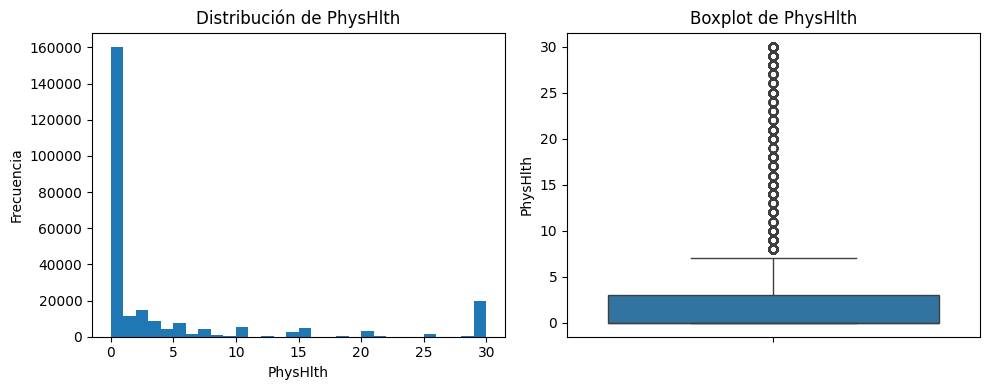

In [23]:
plot_univariate_distribution(df_multi, 'PhysHlth')

#### **GenHlth (Salud General Percibida)**

La variable GenHlth representa la percepción general que tiene la persona sobre su estado de salud. Es una variable ordinal que va de 1 a 5, donde valores más bajos indican mejor salud percibida y valores más altos reflejan una peor evaluación del estado general de salud.

In [24]:
df_multi['GenHlth'].describe()

,GenHlth
count,253680.000000
mean,2.511392
std,1.068477
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


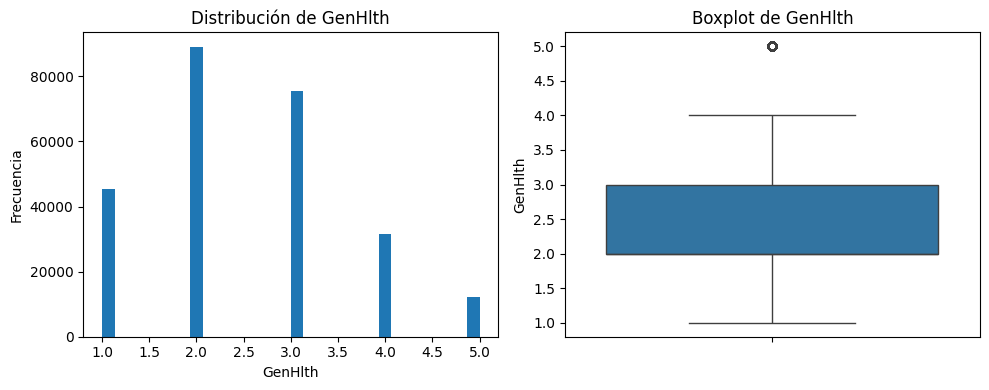

In [25]:
plot_univariate_distribution(df_multi, 'GenHlth')

#### **PhysActivity (Actividad Física)**

La variable PhysActivity indica si la persona realizó actividad física durante el último mes, excluyendo las actividades laborales. Es una variable binaria, donde el valor 1 representa que realizó actividad física y el valor 0 indica que no la realizó

In [26]:
df_multi['PhysActivity'].describe()

,PhysActivity
count,253680.000000
mean,0.756544
std,0.429169
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


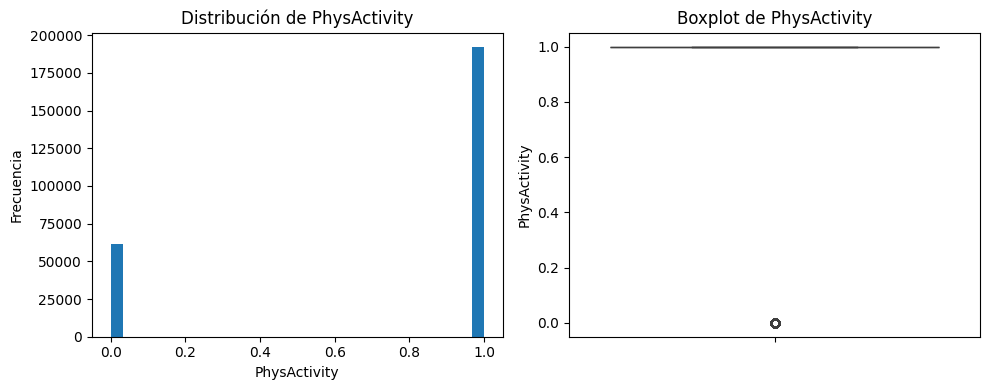

In [27]:
plot_univariate_distribution(df_multi, 'PhysActivity')

#### **HighBP / HighChol (Hipertensión y Colesterol Alto)**

Las variables HighBP y HighChol indican si la persona fue diagnosticada con presión arterial alta o colesterol alto, respectivamente. Ambas son variables binarias, donde el valor 1 indica la presencia de la condición y el valor 0 su ausencia.

In [28]:
df_multi['HighBP'].describe()

,HighBP
count,253680.000000
mean,0.429001
std,0.494934
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [29]:
df_multi['HighChol'].describe()

,HighChol
count,253680.000000
mean,0.424121
std,0.494210
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


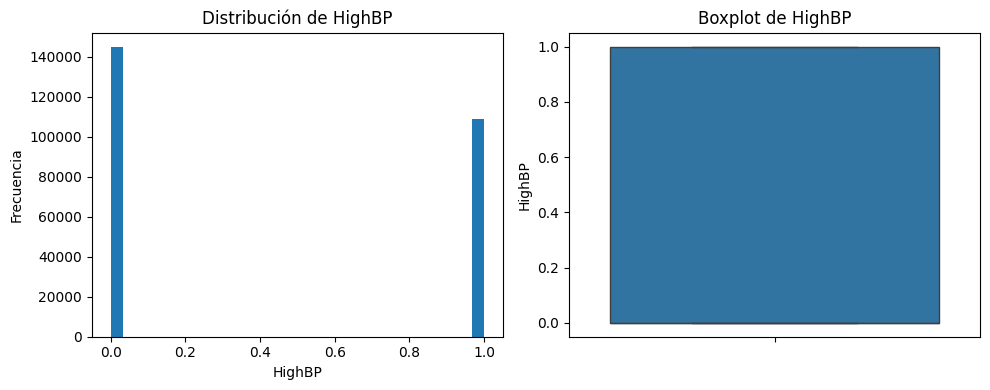

In [30]:
plot_univariate_distribution(df_multi, 'HighBP')

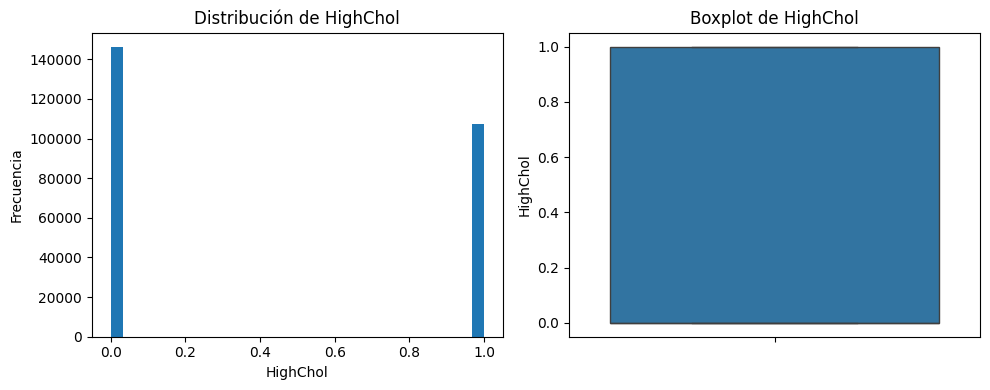

In [31]:
plot_univariate_distribution(df_multi, 'HighChol')

#### **Age (Grupo Etario)**

La variable Age representa la edad del individuo categorizada en rangos etarios. Es una variable ordinal que agrupa a las personas en diferentes categorías de edad, permitiendo analizar patrones de salud asociados a distintas etapas de la vida.

In [32]:
df_multi['Age'].describe()

,Age
count,253680.000000
mean,8.032119
std,3.054220
min,1.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,13.000000


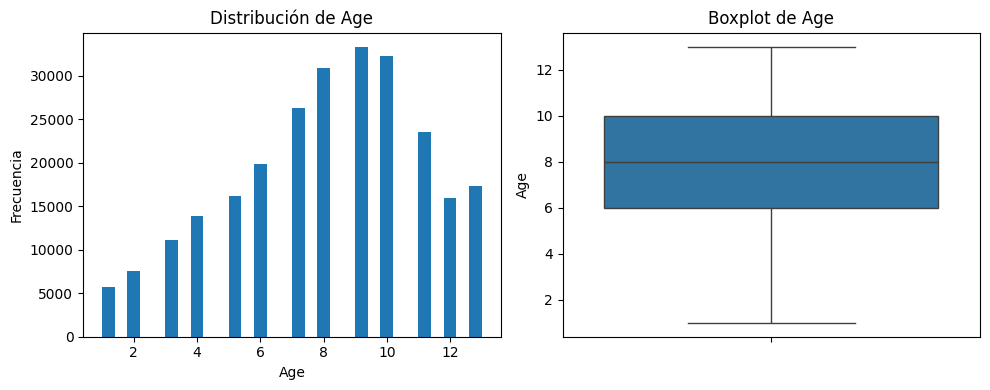

In [33]:
plot_univariate_distribution(df_multi, 'Age')

### **Análisis univariado de variables cualitativas / categóricas**

(binarias u ordinales)

1. HighBP
2. HighChol
3. CholCheck
4. Smoker
5. Stroke
6. HeartDiseaseorAttack
7. PhysActivity
8. Fruits
9. Veggies
10. HvyAlcoholConsump
11. AnyHealthcare
12. NoDocbcCost
13. DiffWalk
14. Sex

In [34]:
import matplotlib.pyplot as plt

def analisis_univariado_categorica(df, variable):
    conteo = df[variable].value_counts().sort_index()
    porcentaje = conteo / conteo.sum() * 100

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.bar(conteo.index.astype(str), porcentaje)
    ax.set_title(f'Distribución de {variable}')
    ax.set_ylabel('Porcentaje (%)')
    ax.set_xlabel(variable)

    for i, v in enumerate(porcentaje):
        ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    display(porcentaje.round(2))

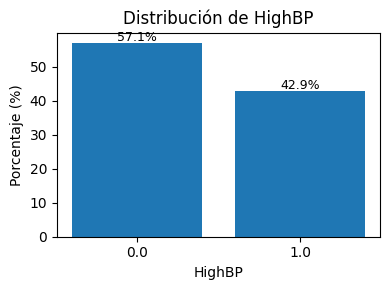

,count
HighBP,
0.0,57.1
1.0,42.9


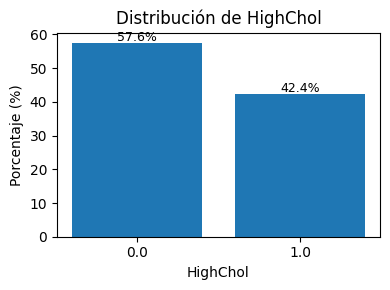

,count
HighChol,
0.0,57.59
1.0,42.41


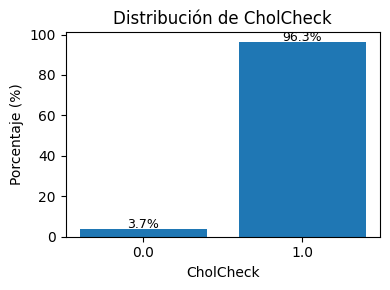

,count
CholCheck,
0.0,3.73
1.0,96.27


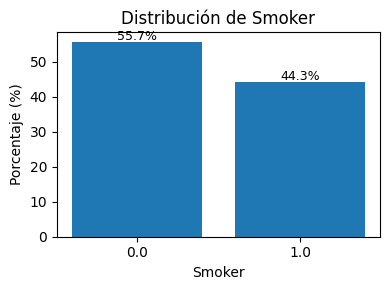

,count
Smoker,
0.0,55.68
1.0,44.32


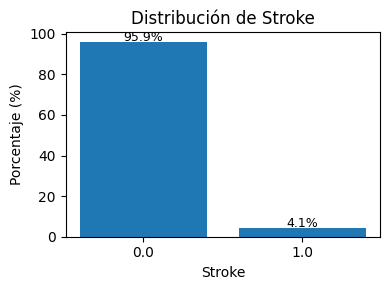

,count
Stroke,
0.0,95.94
1.0,4.06


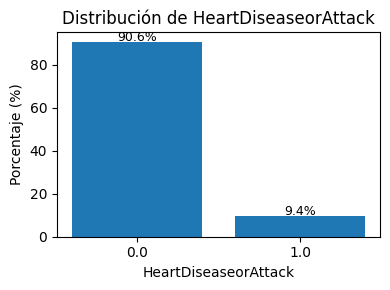

,count
HeartDiseaseorAttack,
0.0,90.58
1.0,9.42


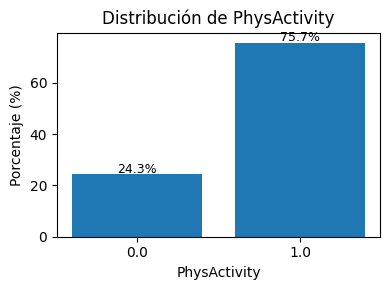

,count
PhysActivity,
0.0,24.35
1.0,75.65


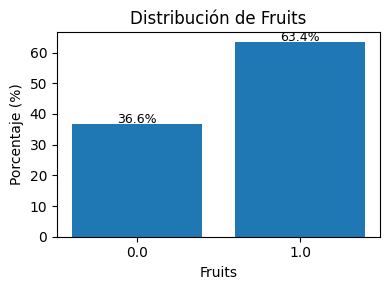

,count
Fruits,
0.0,36.57
1.0,63.43


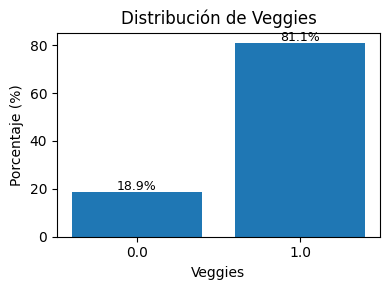

,count
Veggies,
0.0,18.86
1.0,81.14


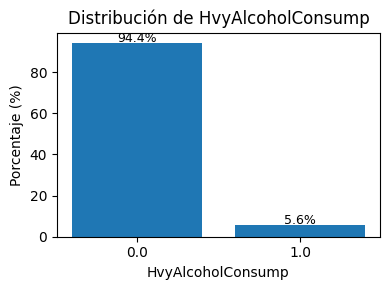

,count
HvyAlcoholConsump,
0.0,94.38
1.0,5.62


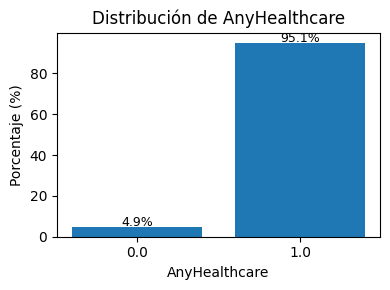

,count
AnyHealthcare,
0.0,4.89
1.0,95.11


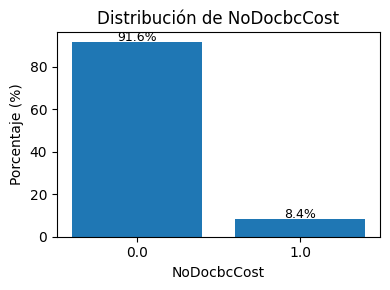

,count
NoDocbcCost,
0.0,91.58
1.0,8.42


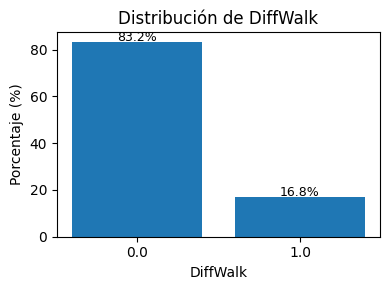

,count
DiffWalk,
0.0,83.18
1.0,16.82


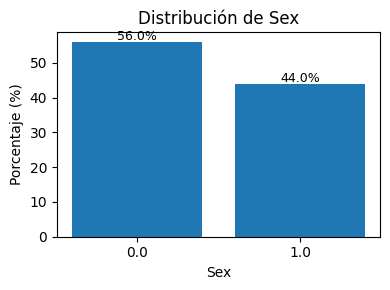

,count
Sex,
0.0,55.97
1.0,44.03


In [35]:
variables_categoricas = [
    'HighBP',
    'HighChol',
    'CholCheck',
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
    'Sex'
]

for var in variables_categoricas:
    analisis_univariado_categorica(df_multi, var)

# EDA - Análisis Exploratorio Bivariado

Luego de analizar las variables de forma individual (análisis univariado), se procede a realizar un análisis exploratorio bivariado, cuyo objetivo es estudiar la relación entre cada variable explicativa y la variable objetivo Diabetes_012.

En esta etapa se busca identificar patrones, diferencias y asociaciones entre los distintos factores de riesgo y el estado de diabetes de los individuos (sin diabetes, prediabetes y diabetes). Este análisis permite evaluar qué variables muestran mayor capacidad discriminativa entre clases y cuáles podrían aportar mayor información al momento de construir modelos predictivos.

Se analizan dos tipos de relaciones principales:
	•	Variables categóricas vs. variable objetivo, utilizando comparaciones de proporciones y gráficos de barras.
	•	Variables cuantitativas vs. variable objetivo, mediante la comparación de distribuciones entre clases (boxplots).

Los resultados de este análisis sirven como base para:
	•	La selección y transformación de variables (feature engineering).
	•	La interpretación de los factores de riesgo asociados a la diabetes.
	•	La toma de decisiones previas al modelado y balanceo de clases.

### Variables cualitativas / categóricas vs estado de diabetes (Diabetes_012)

En esta sección se analiza cómo se distribuyen las variables categóricas (binarias u ordinales) según el estado de diabetes:
0 = No diabetes, 1 = Prediabetes, 2 = Diabetes.

El objetivo es identificar diferencias en proporciones entre los grupos y detectar variables que presenten un comportamiento claramente distinto según el estado de diabetes, lo que las convierte en potenciales factores explicativos relevantes para el modelo.

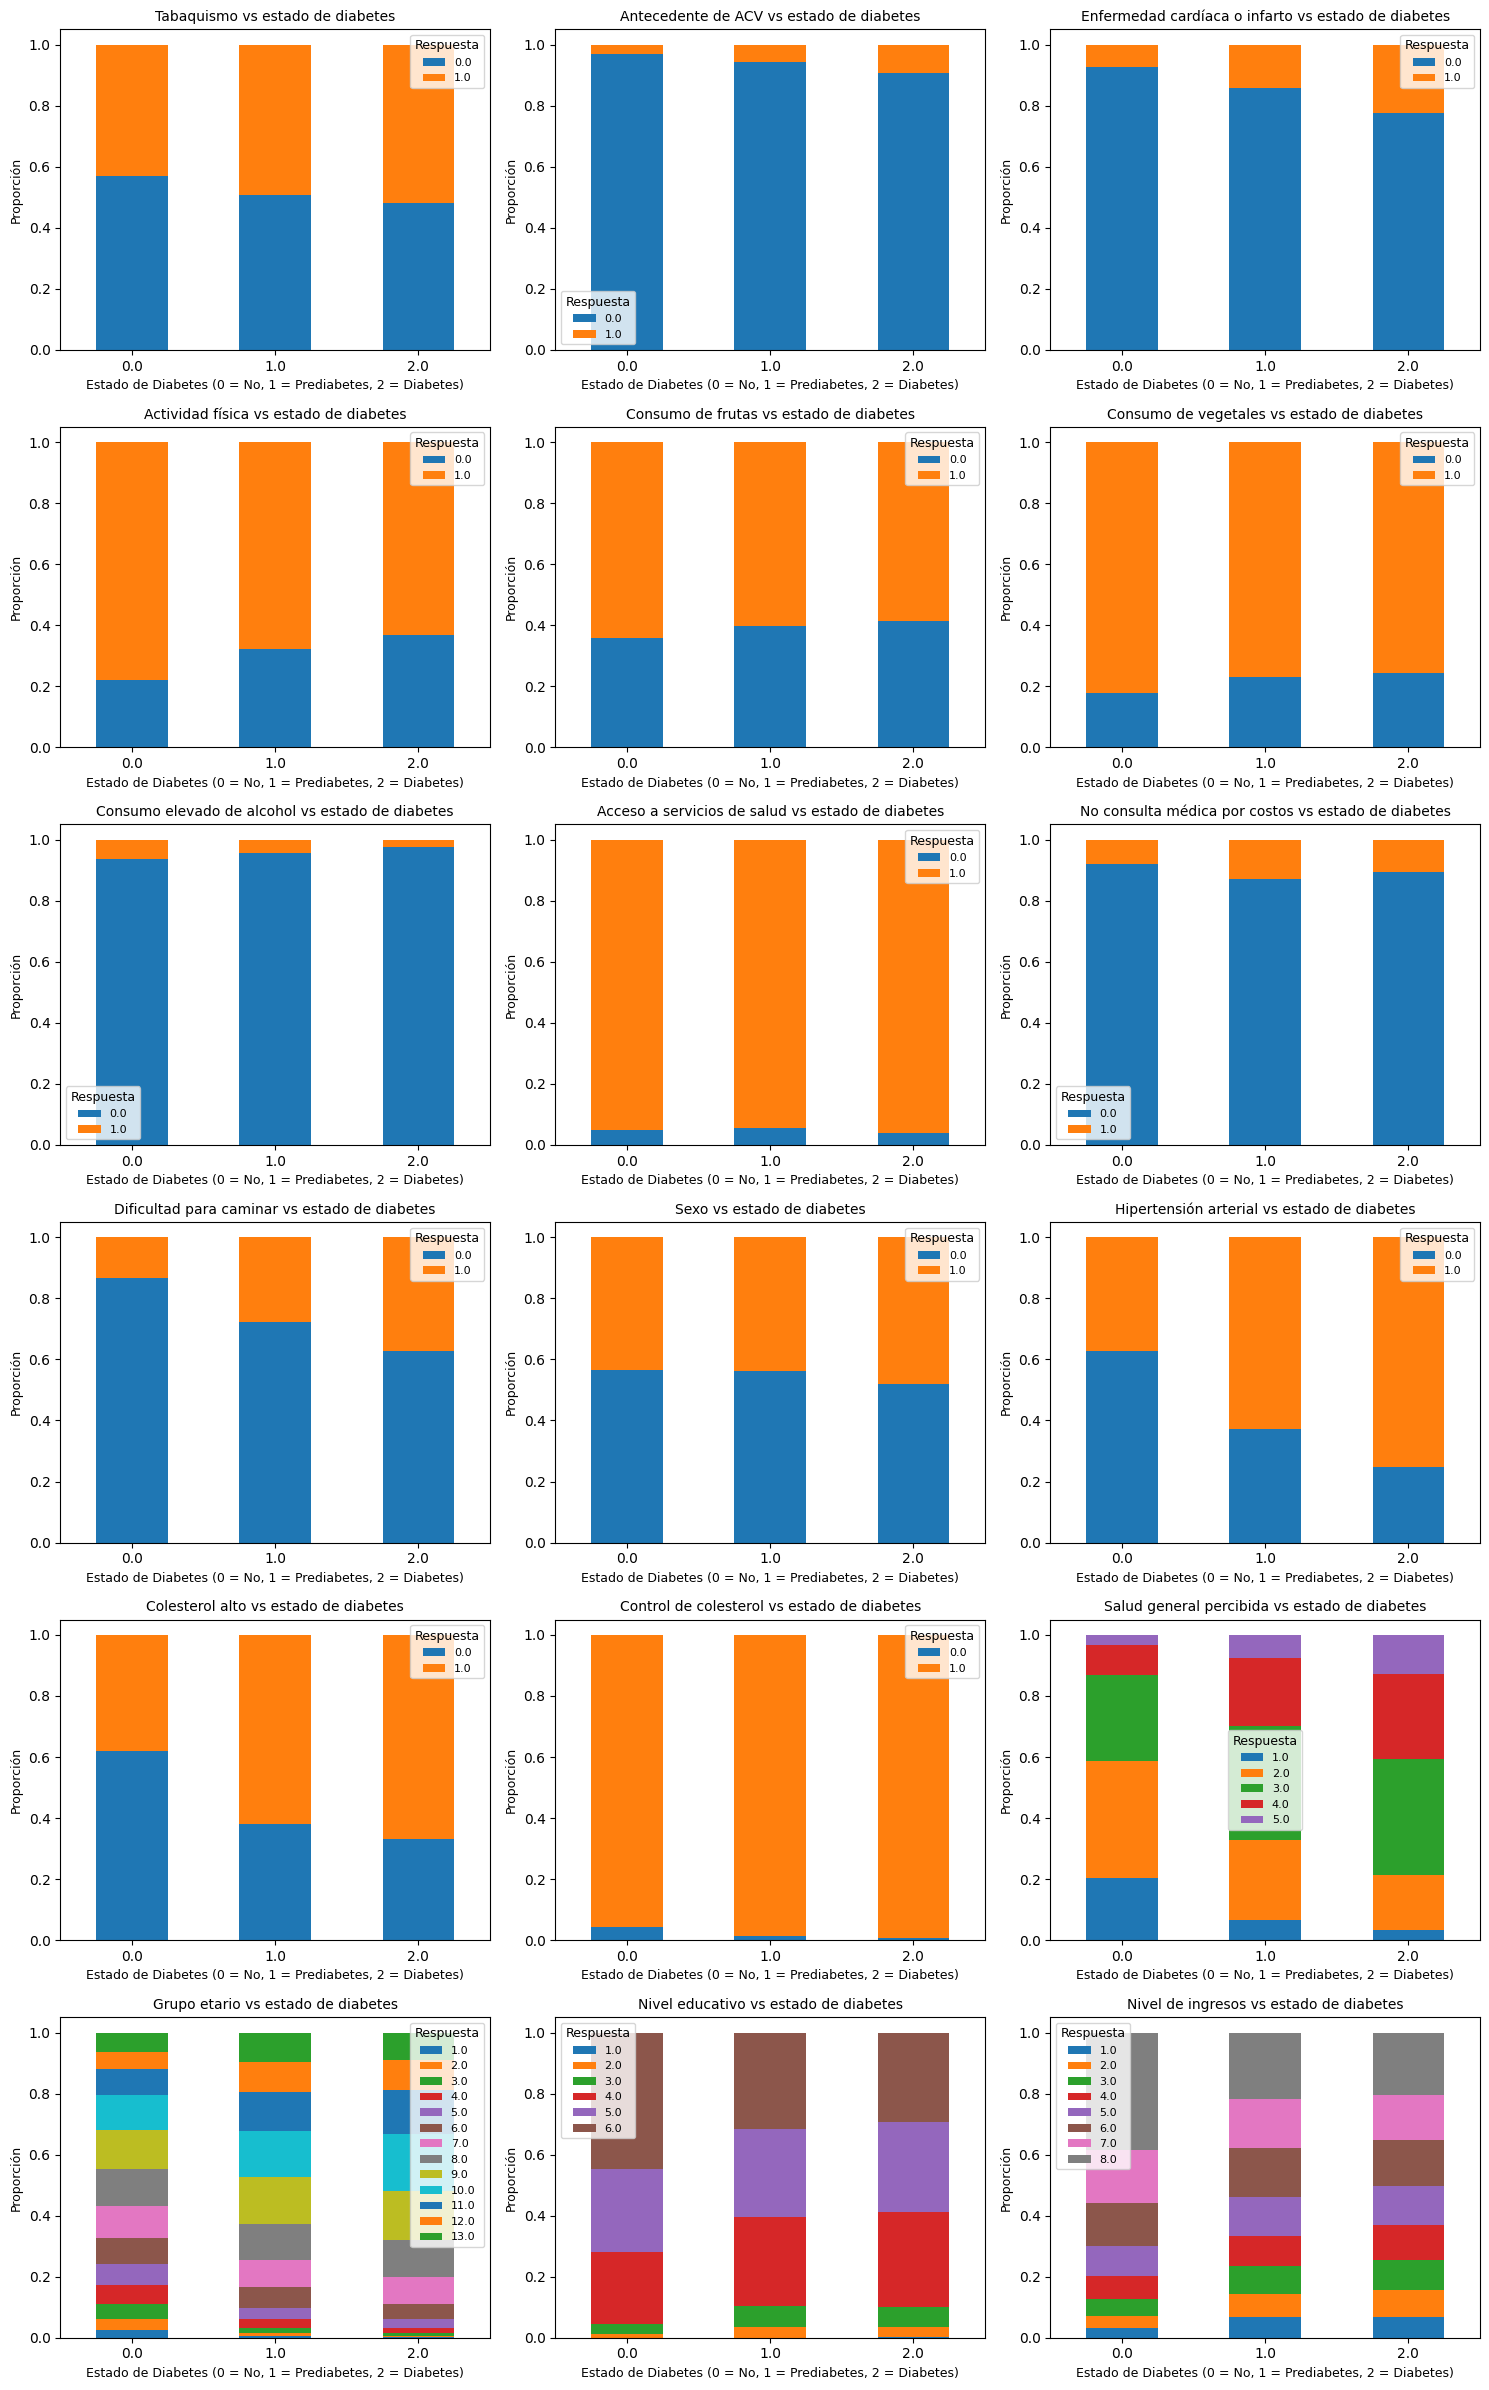

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cat_vars = [
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
    'Sex',
    # agregadas al final
    'HighBP',
    'HighChol',
    'CholCheck',
    'GenHlth',
    'Age',
    'Education',
    'Income'
]

titles_es = {
    'Smoker': 'Tabaquismo',
    'Stroke': 'Antecedente de ACV',
    'HeartDiseaseorAttack': 'Enfermedad cardíaca o infarto',
    'PhysActivity': 'Actividad física',
    'Fruits': 'Consumo de frutas',
    'Veggies': 'Consumo de vegetales',
    'HvyAlcoholConsump': 'Consumo elevado de alcohol',
    'AnyHealthcare': 'Acceso a servicios de salud',
    'NoDocbcCost': 'No consulta médica por costos',
    'DiffWalk': 'Dificultad para caminar',
    'Sex': 'Sexo',
    'HighBP': 'Hipertensión arterial',
    'HighChol': 'Colesterol alto',
    'CholCheck': 'Control de colesterol',
    'GenHlth': 'Salud general percibida',
    'Age': 'Grupo etario',
    'Education': 'Nivel educativo',
    'Income': 'Nivel de ingresos'
}

target = 'Diabetes_012'

n_cols = 3
n_rows = int(np.ceil(len(cat_vars) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    prop_table = (
        df_multi
        .groupby(target)[var]
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    prop_table.plot(kind='bar', stacked=True, ax=axes[i])

    axes[i].set_title(f'{titles_es[var]} vs estado de diabetes', fontsize=10)
    axes[i].set_xlabel('Estado de Diabetes (0 = No, 1 = Prediabetes, 2 = Diabetes)', fontsize=9)
    axes[i].set_ylabel('Proporción', fontsize=9)
    axes[i].legend(title='Respuesta', fontsize=8, title_fontsize=9)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

A partir del análisis de las variables categóricas consideradas se observan distintos patrones de asociación con el estado de diabetes.

En primer lugar, las asociaciones más claras y consistentes se presentan en variables de tipo clínico y funcional. En particular, tanto los antecedentes de enfermedad cardíaca o infarto (HeartDiseaseorAttack) como la dificultad para caminar (DiffWalk) muestran un aumento progresivo de la proporción de respuestas afirmativas al pasar de personas sin diabetes, a personas con prediabetes y, finalmente, a personas con diabetes. Esto sugiere una relación directa entre el deterioro del estado metabólico y la presencia de comorbilidades cardiovasculares y limitaciones funcionales.

En el caso de antecedentes de ACV (Stroke), la proporción de personas que reportan haber sufrido un evento cerebrovascular también es mayor en los grupos con prediabetes y diabetes, aunque el evento sigue siendo relativamente poco frecuente en términos absolutos.

Respecto a los hábitos de vida, se observan asociaciones de menor intensidad. La actividad física (PhysActivity) presenta una tendencia clara: la proporción de personas físicamente activas disminuye a medida que aumenta el estado de diabetes, lo que indica una relación inversa entre actividad física y presencia de diabetes. En contraste, variables como tabaquismo (Smoker) y consumo elevado de alcohol (HvyAlcoholConsump) no muestran diferencias marcadas entre los grupos, sugiriendo una asociación débil o nula con el estado de diabetes en este conjunto de datos.

En cuanto a los hábitos alimentarios, tanto el consumo de frutas (Fruits) como el consumo de vegetales (Veggies) presentan variaciones leves entre los grupos, sin cambios abruptos en las proporciones. Esto indica que, al menos de forma aislada, estas variables no discriminan fuertemente entre los distintos estados de diabetes.

Las variables relacionadas con el acceso al sistema de salud muestran un patrón relativamente homogéneo. El acceso a servicios de salud (AnyHealthcare) es alto en todos los grupos, mientras que la falta de consulta médica por costos (NoDocbcCost) presenta diferencias pequeñas, lo que sugiere que las barreras económicas no varían sustancialmente según el estado de diabetes dentro de esta población.

Finalmente, la variable sexo (Sex) no evidencia diferencias significativas en la distribución entre los distintos estados de diabetes, lo que indica una asociación débil o inexistente en este análisis bivariado.

### Análisis de variables ordinales mediante mapas de calor


En esta sección se analizan variables ordinales clave (grupo etario, nivel educativo, nivel de ingresos y estado de salud general) en relación con el estado de diabetes. Se utilizan mapas de calor para visualizar la distribución proporcional de cada categoría según el estado de diabetes, lo que permite identificar patrones, gradientes de riesgo y asociaciones claras entre el empeoramiento de estas condiciones y una mayor prevalencia de prediabetes y diabetes. Este enfoque facilita una interpretación más sintética y comparativa que los gráficos de barras tradicionales.

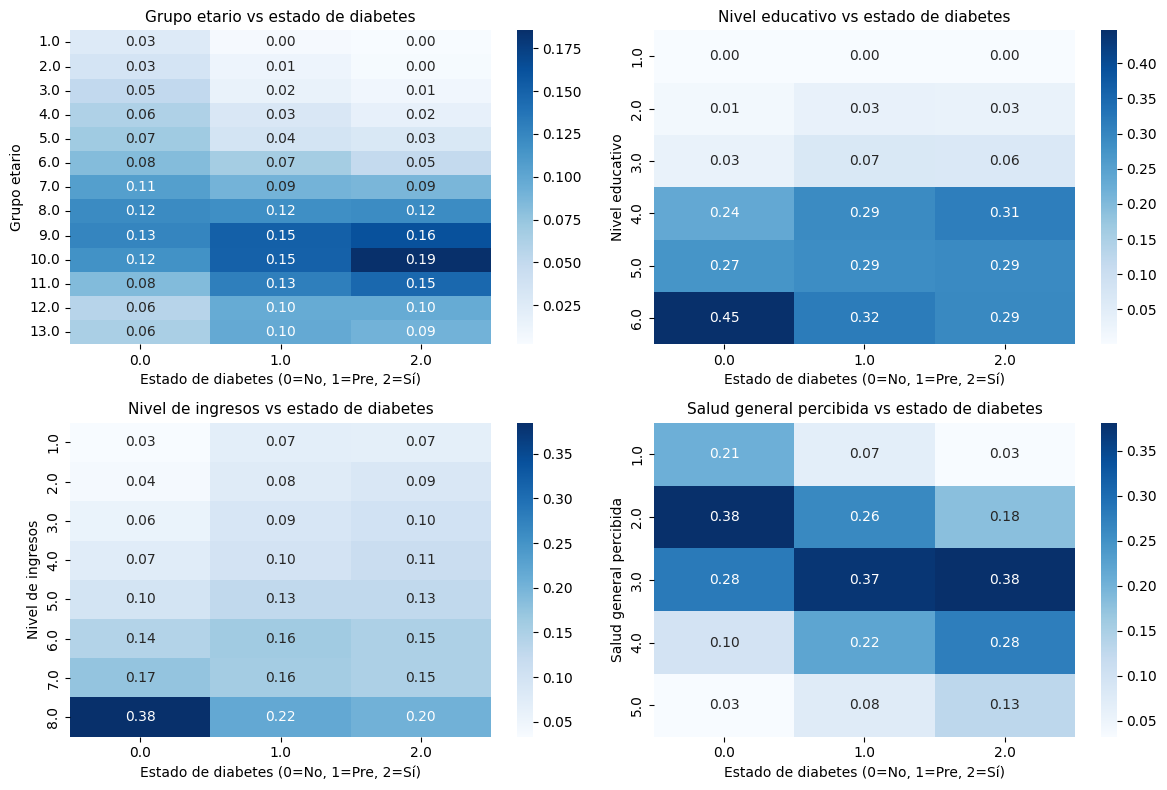

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ord_vars = {
    'Age': 'Grupo etario',
    'Education': 'Nivel educativo',
    'Income': 'Nivel de ingresos',
    'GenHlth': 'Salud general percibida'
}

target = 'Diabetes_012'

n_cols = 2
n_rows = int(np.ceil(len(ord_vars) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, (var, title) in enumerate(ord_vars.items()):
    ct = pd.crosstab(
        df_multi[var],
        df_multi[target],
        normalize='columns'
    )

    sns.heatmap(
        ct,
        annot=True,
        fmt='.2f',
        cmap='Blues',
        ax=axes[i]
    )

    axes[i].set_title(f'{title} vs estado de diabetes', fontsize=11)
    axes[i].set_xlabel('Estado de diabetes (0=No, 1=Pre, 2=Sí)')
    axes[i].set_ylabel(title)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Variables categóricas vs estado de diabetes (Diabetes_012)